In [1]:
"""Library and Data Imports"""
import tensorflow as tf
# CUDA_VISIBLE_DEVICES=""
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import imdb
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras import optimizers
from tensorflow.keras import losses
from tensorflow.keras import metrics
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)


2022-08-22 23:04:47.873971: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-08-22 23:04:47.873999: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


17464789/17464789 [==============================] - 3s 0us/step


In [2]:
"""Decoding Back to English"""
word_index = imdb.get_word_index()
reverse_word_index = dict(
    [(value,key) for (key,value) in word_index.items()]
)

decoded_review = ' '.join(
    [reverse_word_index.get(i-3, '?') for i in train_data[0]]
)
# print(decoded_review)

1641221/1641221 [==============================] - 0s 0us/step


In [3]:
"""One hot encode the reviews"""

def vectorize_sequences(sequences,dimension=10000):
    results = np.zeros((len(sequences),dimension))
    for i, sequence in enumerate(sequences):
        results[i,sequence]=1
    return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

# Split into Test/Train

x_val = x_train[:10000]
partial_x_train = x_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]

    
    

In [4]:
"""Building the network"""
# Not reading the details on the model at the moment
model = models.Sequential()
model.add(layers.Dense(16, activation = 'relu', input_shape = (10000,)))
model.add(layers.Dense(16, activation = 'relu'))
model.add(layers.Dense(1, activation = 'sigmoid'))
optimizer = optimizers.RMSprop(learning_rate=0.001)
model.compile(optimizer=optimizer, loss = 'binary_crossentropy',metrics=['accuracy'])
history = model.fit(
    partial_x_train,
    partial_y_train,
    epochs=4,
    batch_size=512,
    validation_data=(x_val,y_val))

2022-08-22 23:05:17.006467: E tensorflow/stream_executor/cuda/cuda_driver.cc:271] failed call to cuInit: UNKNOWN ERROR (100)
2022-08-22 23:05:17.006505: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (DESKTOP-NNDNO80): /proc/driver/nvidia/version does not exist
2022-08-22 23:05:17.006904: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Epoch 1/4


2022-08-22 23:05:17.212813: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 600000000 exceeds 10% of free system memory.


30/30 [==============================] - 1s 24ms/step - loss: 0.5192 - accuracy: 0.7915 - val_loss: 0.4018 - val_accuracy: 0.8642
Epoch 2/4
 1/30 [>.............................] - ETA: 0s - loss: 0.3720 - accuracy: 0.8906

2022-08-22 23:05:18.284886: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 400000000 exceeds 10% of free system memory.


30/30 [==============================] - 0s 11ms/step - loss: 0.3131 - accuracy: 0.9008 - val_loss: 0.3105 - val_accuracy: 0.8856
Epoch 3/4
30/30 [==============================] - 0s 11ms/step - loss: 0.2279 - accuracy: 0.9279 - val_loss: 0.2905 - val_accuracy: 0.8848
Epoch 4/4
30/30 [==============================] - 1s 28ms/step - loss: 0.1822 - accuracy: 0.9409 - val_loss: 0.2903 - val_accuracy: 0.8835


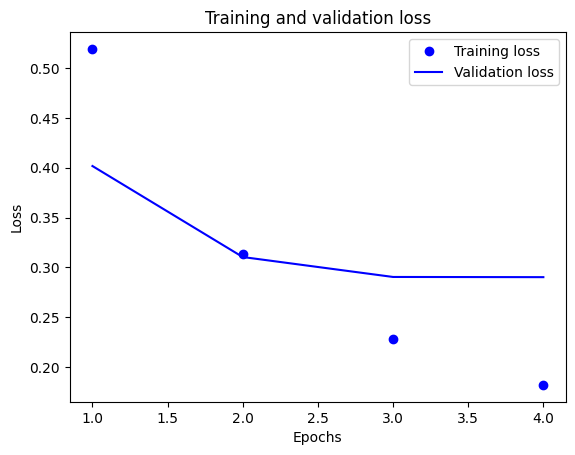

In [5]:
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
acc = history_dict['accuracy']
epochs = range(1, len(acc) + 1)

plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [6]:
"""Evaluating the Model"""

results = model.evaluate(x_test, y_test)
results

133/782 [====>.........................] - ETA: 0s - loss: 0.3146 - accuracy: 0.8675

2022-08-22 23:05:25.822325: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 1000000000 exceeds 10% of free system memory.


782/782 [==============================] - 1s 1ms/step - loss: 0.3062 - accuracy: 0.8758


[0.3062009811401367, 0.8758000135421753]